<a href="https://colab.research.google.com/github/Vikram310/100daysofdatascience/blob/main/PostRead_Knn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Content**

- **Google Image Search**

- **KNN based Imputation**

- **Cosine Similarity**

- **Binary bag of words**

- **Jaccard Similarity**



## **Google Image Search**

- We have seen how KNN test time complexity is too damn high, so why even teach it

Lets now look into Google Image search, which  a Real world Appication for KNN:
- So imagine we have an image which we pass through Deep Learning Algorithms <font color='red'> which we will cover in later lectures<font> 


- Deep Learning converts the image into a d-dimensional vector

- in this d-dimensional space, if there are two similiar images $I_1$ and $I_2$, they tend to be very close to each other.





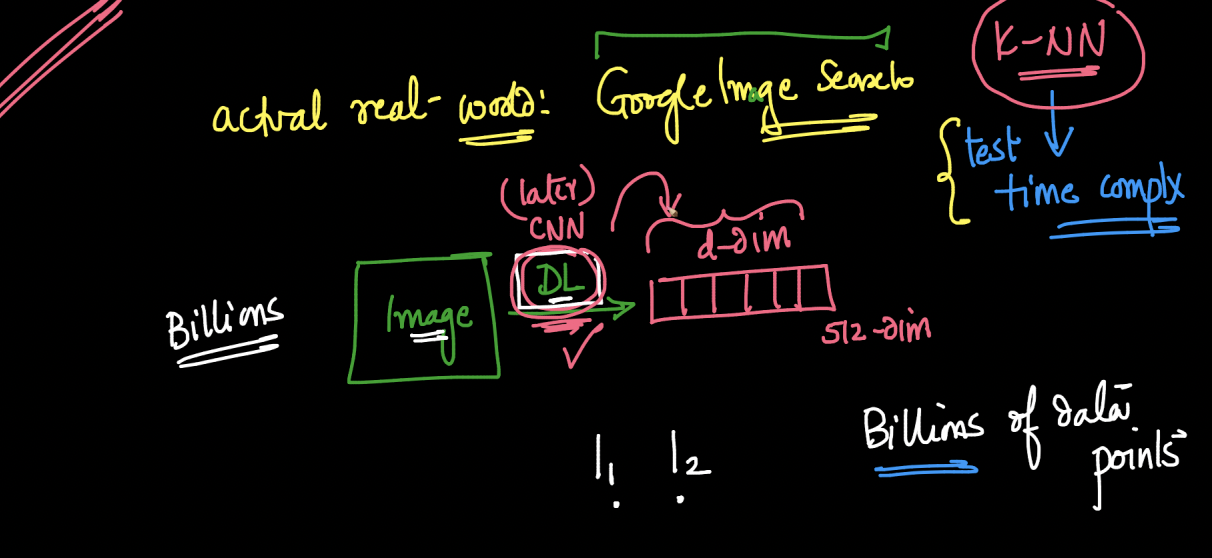

Lets suppose if we Google search Hyderbad 
- The most common image we get is Char minar $I_1$ 
- The 2nd most common image we get is Buddha Statue $I_2$
- Then Google Engine searches for similar images of both $I_1$ and $I_2$ using Nearest Neighbors from billion images.

- A few other examples where Nearest neighbors are checked for similar things and recommend it to user are Pinterest and TikTok

This shows how KNN is widely in use algorithm 

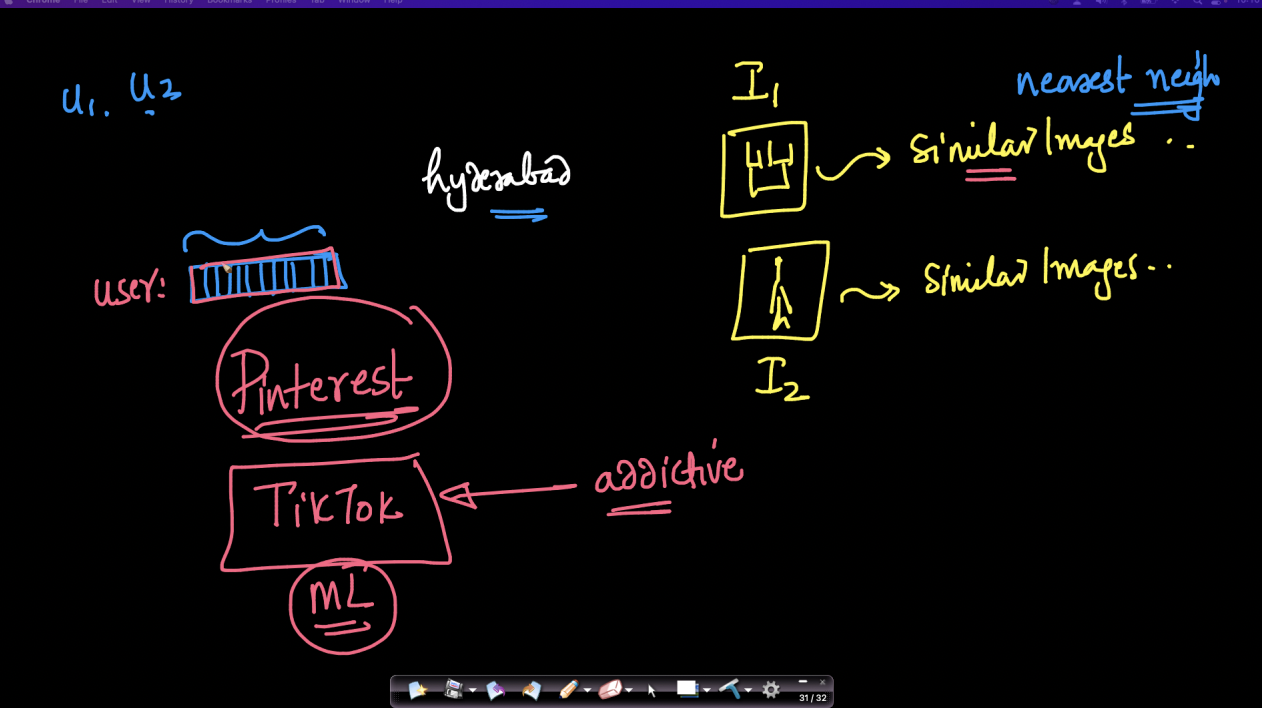

## **KNN based Imputation**

Lets say we have a d-dimensionsal features with n samples. 
- Now for the $x_i$ feature,
    - the $j^{th}$ dimension is missing  


We have seen in EDA, hown imputation is used to fill the missing values 


#### **Can we use KNN for Imputating missing data ?** 
1. to find the value of $x_{ij}$, we find the K Nearest neighbors  for the $x_{i}$ but excluding all the dimensions which have missing value.
    - Hence we remove the jth dimension and compute the nearest neighbors 

2. Supposedly, after performing KNN(with K = 5) we get $x_{10}, x_{12}, x_{14}, x_{31}, x_{42}$ as nearest neighbors
    - we then take the average of the $j^{th}$  values of each of the nearest neighbors and use it to impute the missing value for $x_i$




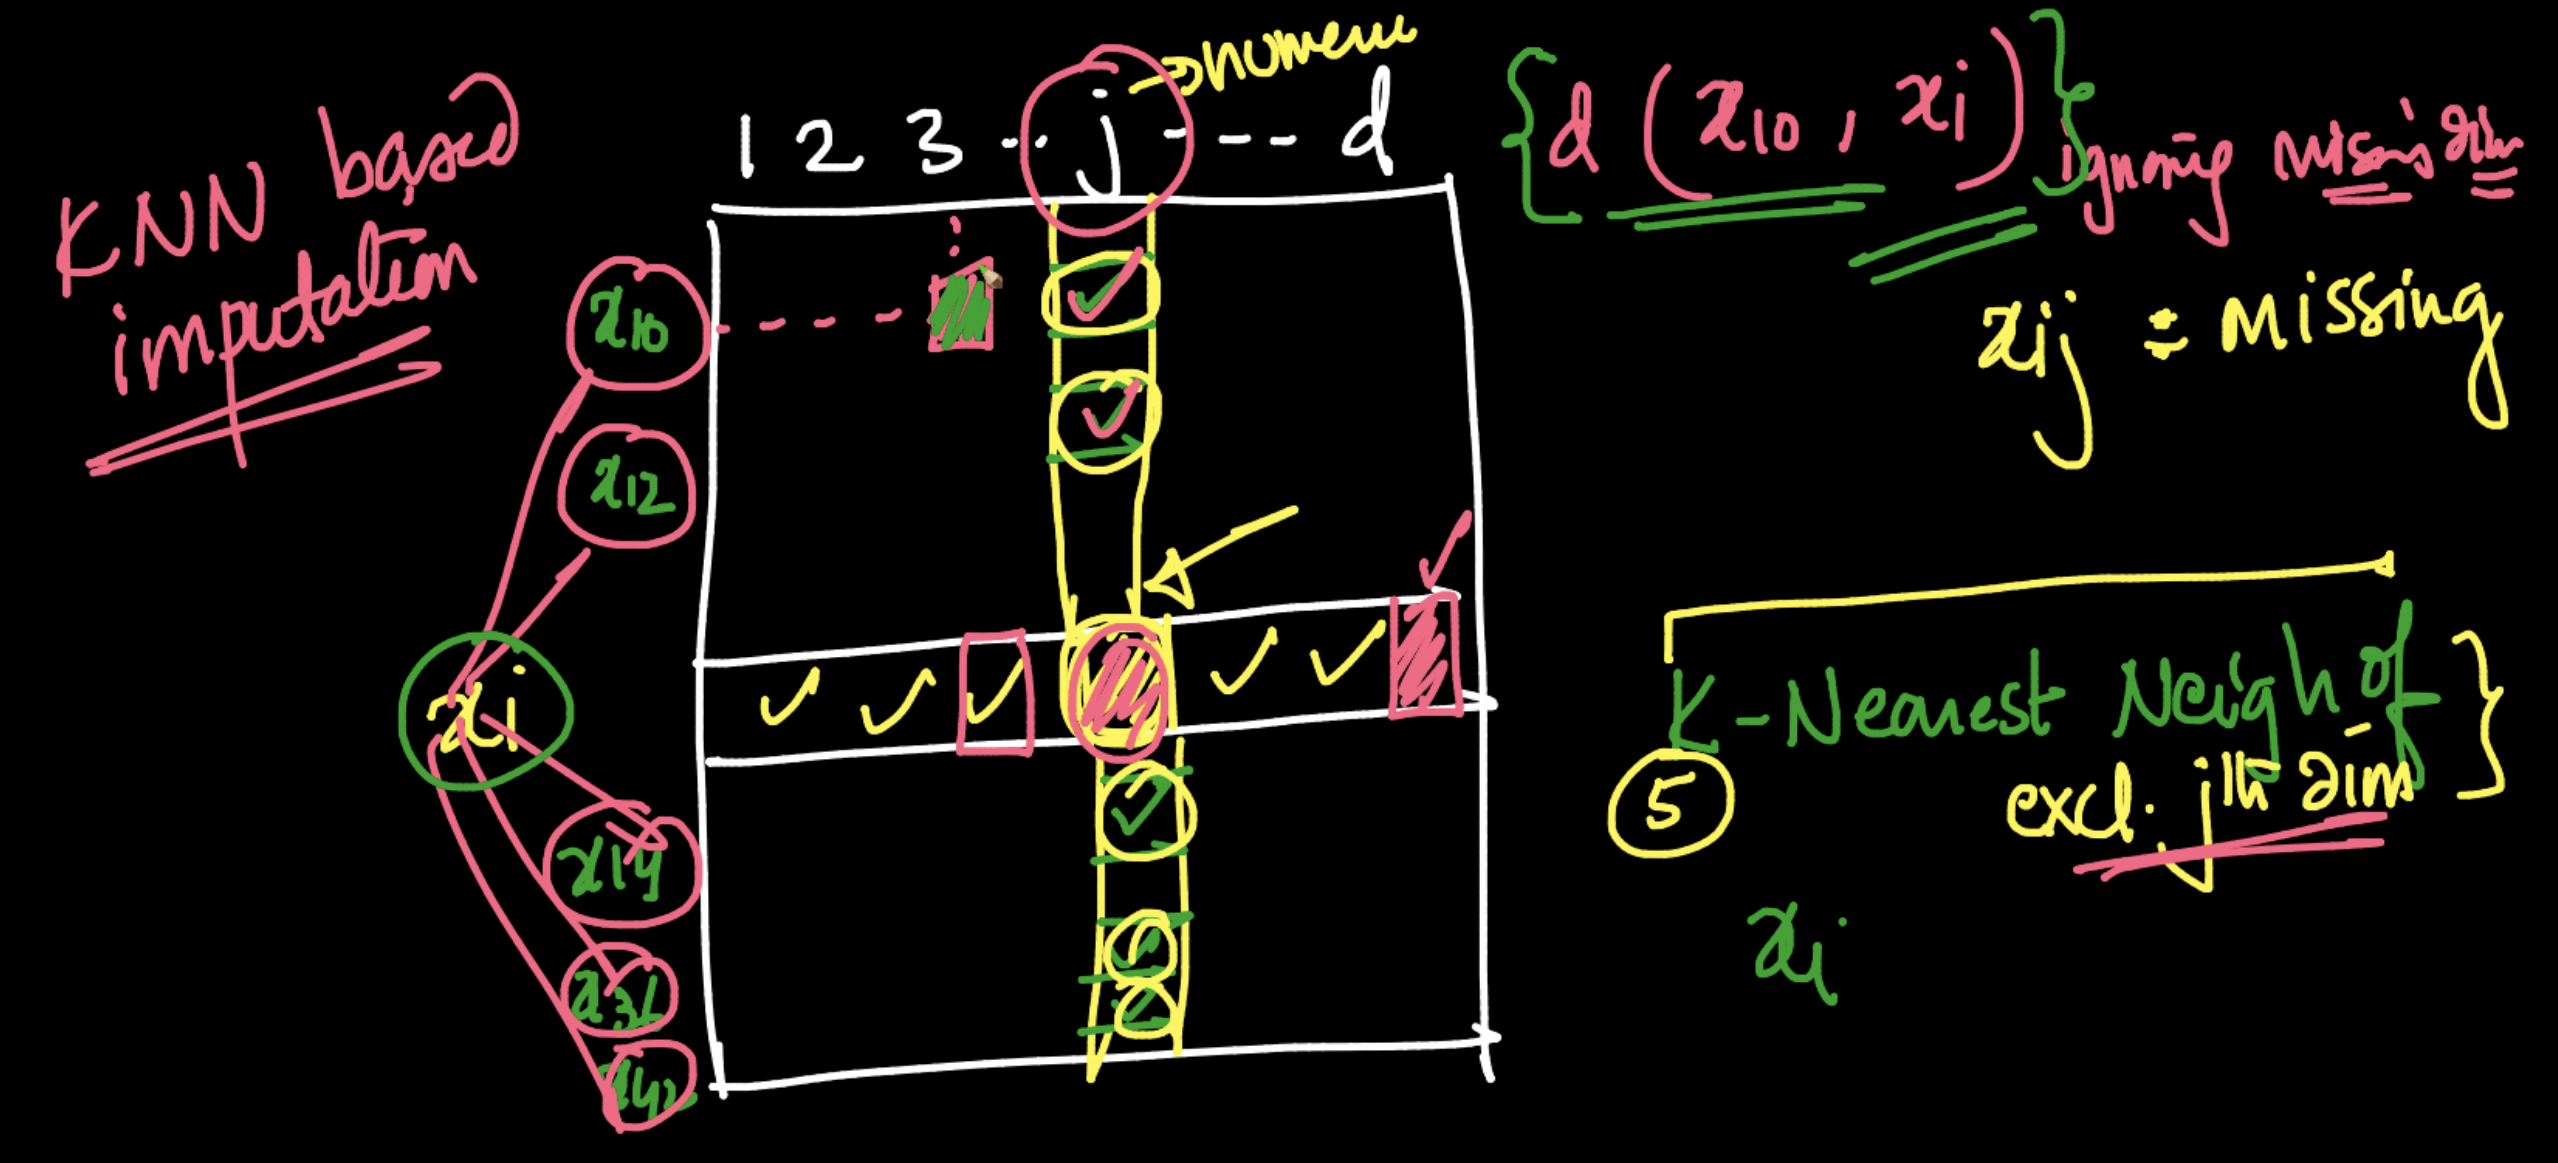

Lets implement KNNImputator
- By creating a Dummy data having two nan  

In [ ]:
import numpy as np

X = np.array([[3,np.nan,5],
              [1,0,0],
              [3,3,3],
              [2,5,np.nan],
              [1,1,1]] )



Now we use the sklearn for KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

impute =  KNNImputer(n_neighbors = 1)
X = impute.fit_transform(X)

print(X)

[[3. 5. 5.]
 [1. 0. 0.]
 [3. 3. 3.]
 [2. 5. 5.]
 [1. 1. 1.]]


## Cosine Similarity

Recall
- how Euclidean distance is the hypothesis distance between two points
- and how Manhattan distance is the distance covered along the axes

- We also know, how Euclidean Distance fails due to Curse of Dimensionality.

- Notice how both Manhatthan and Euclidean covers the magnitude of the distance 
#### What if we now look into the angular Distance between two points?

- Lets understand this with an example
- Suppose we have two points $x_1$ and $x_2$ 
    - which are very close to each other,
    - and are in the same vector direction. 
    - If we measure the Angular distance and discard 

#### How do we measure these Angular distance ?
- Using the cosine function  (cosθ)
- Since if two points are similar, the Angular distance becomes 0, then cosθ = 1


If we have three points $x_1$,$x_2$,$x_3$ which have angles of $θ$ and $ϕ$
- Cosθ and cosϕ becomes are angular distance


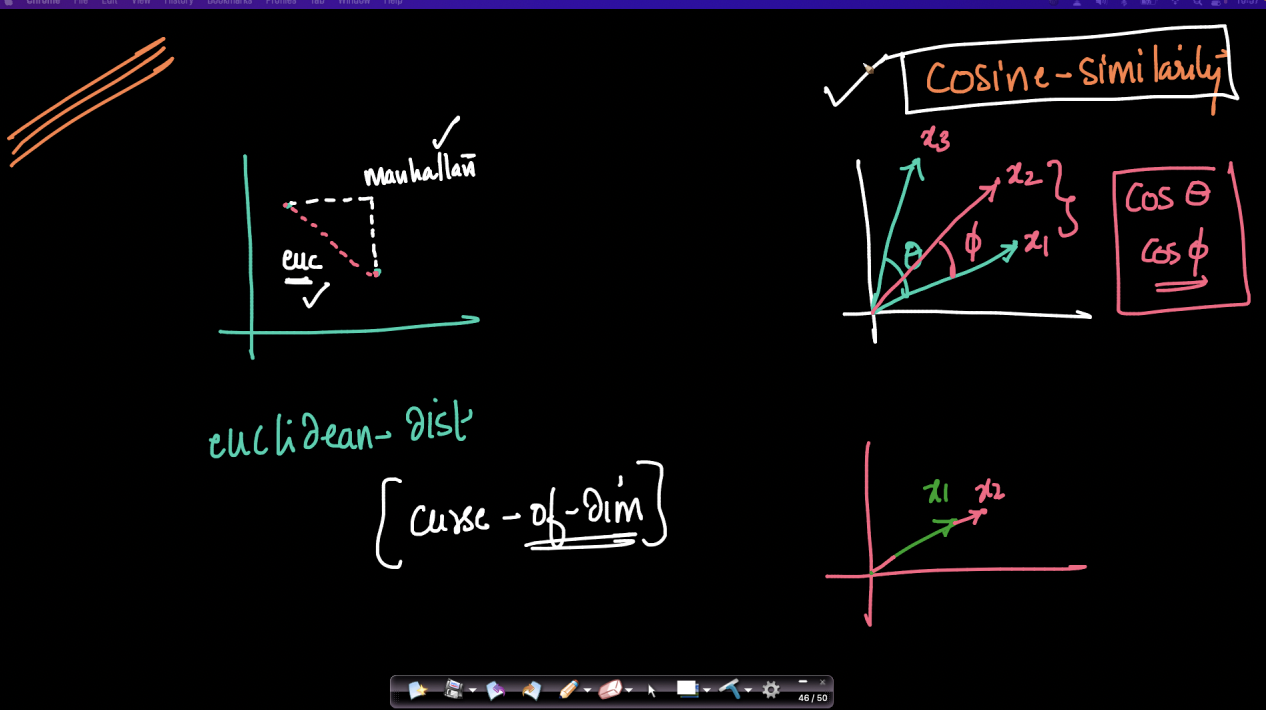

#### How can we calculate Cosθ for two d-dimensional features ?
Lets say we want to find how similar $x_1$ and $x_2$ are.
- Remember since $x_1$ and $x_2$ are just d-dimensional vectors
- Cosθ is just the dot product of these two vectors divided by the Norm of each vector.
    - $Cosθ_{12} = \frac{x_1.x_2}{||x_1||.||x_2||}$

#### If d very large, wont calculation of  norm of Vector be a time consuming task ?
- Recall how data is normalized, and norm of Normalized data = 1,
- Hence $Cosθ_{12} = x_1.x_2$


Note: Cosine Similarity is introduced when:
- wewant to find the angular distance
- Magnitude of vector is not important



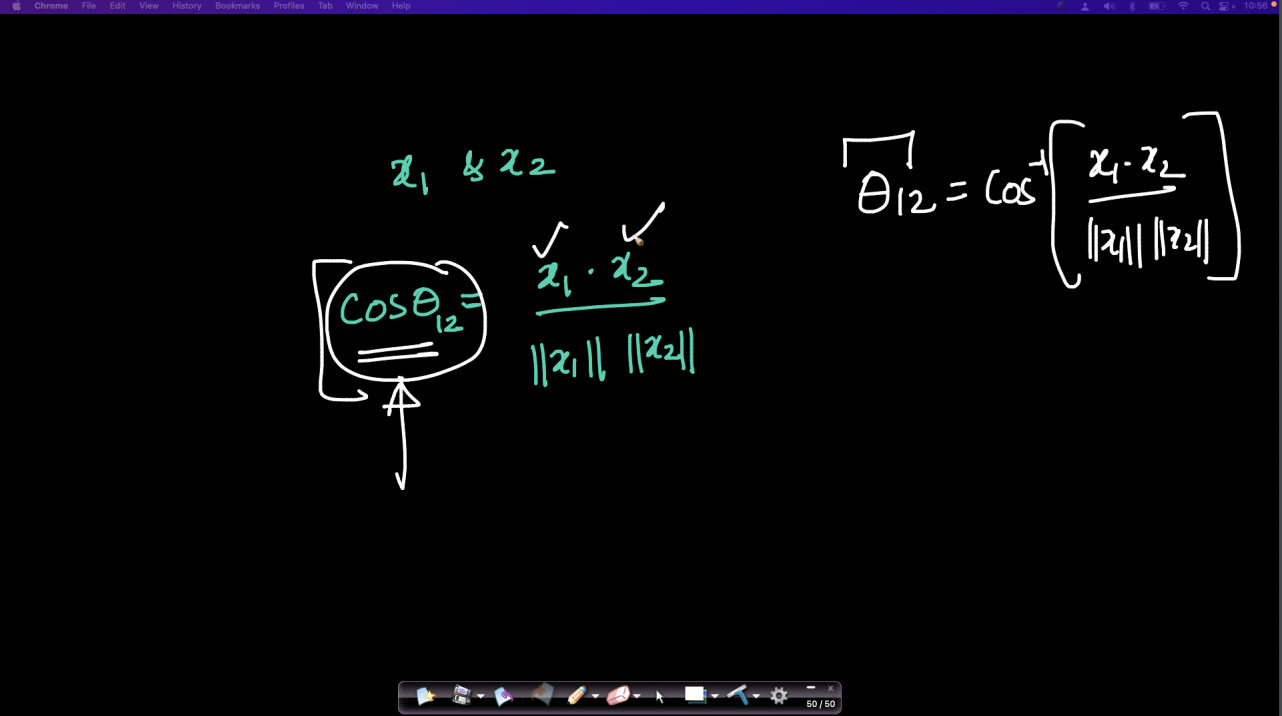

## Binary Bag of Words

Lets understand this using a simple text sentence example 

Suppose we have two sentences
- S1: The dog barked at him
- S2: The cat bit him

#### How to vectorize these sentences? 
- Lets create a vector of all the unique words present in all the sentences such that:
    - Each component of the vector corresponding to the unique words

    - Then Assigning 1 for the word which is in the sentence and 0 if the word is not in the sentence.

- notice each dimension of the vector is representing whether a particular word is present in the sentence or not


- NOTE: there are alot of other ways (like Count Bag of Words, where we count the occurence of each word in all sentences) to present sentences, this is the simplest way of doing it and is called Binary Bag of Words 



Now if we have large text sentences dataset,
- We can see how the dimensionality of the vector becomes very large (approx 1000s)

- And in each dimension of this 1000 represents a word with value 0 or 1 

#### What will be the magnitude of this vector ?
- The magnitude of the vector for each sentence will just be equal to the number of words present in the sentence
    - Since only 1 present if Sentence has that word

- but if we see the two vectors for the sentences, the similarity of these sentences, we care only on the direction of the vectors and how close they are to each other

Now if we take another sentence into account,
- S3: The dog ran at him

- Since it has the word dog in it, the vector representation of S3, will be closely similar to the vector representation of S1 through Cosine Similarity.


Hence we saw just how a simple example in text, we do not care about the magnitude of the vector but the Angular distance for each vector matters. 














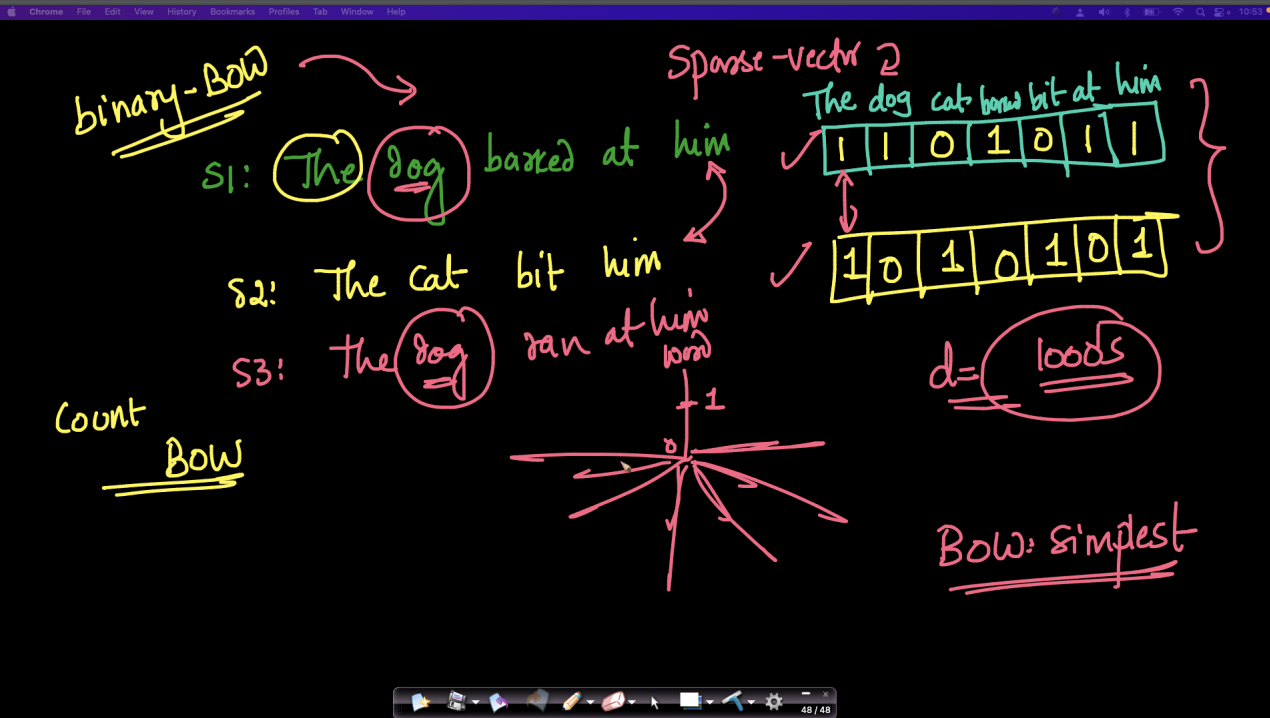

## Jaccard Similarity

We also have another Similarity Metrics like Cosine Similarity to check how similar sentences are. This similarity metrics is called Jaccard Similarity.


- It measures number of common words over all the words present in the sentences.
 - Jaccard Similarity = $\frac{S1 ∩ S2}{S1 \cup S2}$

    - The range is 0 to 1. 
    - If score is 1, it means that they are identical. 

Note: We prefer Jaccard Similarity when we do not care about the data duplication else cosine similarity is good for measuring the similarity between two vectors 


Lets implement Jaccard Similarity and Cosine Similarity


Finding the unique words in all the three sentences

In [ ]:
import numpy as np

s1 = "The Dog ran at him"
s2 = "The Dog bit him"
s3 = "The cat plays with him"

words = np.unique(s1.split()+s2.split()+s3.split())
print(words)

['Dog' 'The' 'at' 'bit' 'cat' 'him' 'plays' 'ran' 'with']


Computing the Binary Bag of Words

In [ ]:
vec_s1 = np.array([1 if i in s1.split() else 0   for i in words])
vec_s2 = np.array([1 if i in s2.split() else 0   for i in words])
vec_s3 = np.array([1 if i in s3.split() else 0   for i in words])

print(vec_s1,vec_s2,vec_s3)

[1 1 1 0 0 1 0 1 0] [1 1 0 1 0 1 0 0 0] [0 1 0 0 1 1 1 0 1]






We will be using sklearn compute [jaccard Similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html)  for each sentence

In [ ]:
from sklearn.metrics import jaccard_score


print('Jaccard Similarity for Sent1 and Sent2:',jaccard_score(vec_s1,vec_s2))
print('Jaccard Similarity for Sent2 and Sent3:',jaccard_score(vec_s2,vec_s3))
print('Jaccard Similarity for Sent1 and Sent3:',jaccard_score(vec_s1,vec_s3))

Jaccard Similarity for Sent1 and Sent2: 0.5
Jaccard Similarity for Sent2 and Sent3: 0.2857142857142857
Jaccard Similarity for Sent1 and Sent3: 0.25


- Notice how Jaccard Similarity between  S1 and S2 is the highest, showing S1 and S2 are similar

Computing  [Cosine Similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) using sklearn

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Since for cosine Similarity, we need 2-D arrays, Reshaping vectors to 2-D array
vec_s1 = vec_s1[None,:]
vec_s2 = vec_s2[None,:]
vec_s3 = vec_s3[None,:]

print('Cosine Similarity for Sent1 and Sent2:',cosine_similarity(vec_s1,vec_s2)[0])
print('Cosine Similarity for Sent2 and Sent3:',cosine_similarity(vec_s2,vec_s3)[0])
print('Cosine Similarity for Sent1 and Sent3:',cosine_similarity(vec_s1,vec_s3)[0])

Cosine Similarity for Sent1 and Sent2: [0.67082039]
Cosine Similarity for Sent2 and Sent3: [0.4472136]
Cosine Similarity for Sent1 and Sent3: [0.4]


- Notice how Cosine Similarity between  S1 and S2 is the highest, showing S1 and S2 are similar